### Multivariable Linear Regression

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [2]:
data=pd.read_csv("Multi_linear.txt", header=None)

In [3]:
data.head()

,0,1,2
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


In [4]:
data.describe()

,0,1,2
count,47.000000,47.000000,47.000000
mean,2000.680851,3.170213,340412.659574
std,794.702354,0.760982,125039.899586
min,852.000000,1.000000,169900.000000
25%,1432.000000,3.000000,249900.000000
50%,1888.000000,3.000000,299900.000000
75%,2269.000000,4.000000,384450.000000
max,4478.000000,5.000000,699900.000000


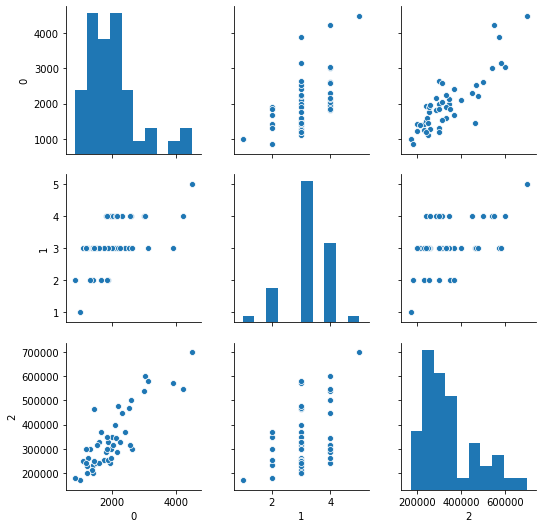

In [5]:
sns.pairplot(data)

## Feature Normalization

To make sure features are on a similar scale:

$x_i = \frac{x_i - \mu_i}{\sigma_i}$

In [6]:
def featureNormalization(X):
    """
    Take in numpy array of X values and return normalize X values,
    the mean and standard deviation of each feature
    """
    mean=np.mean(X,axis=0)
    std=np.std(X,axis=0)
    
    X_norm = (X - mean)/std
    
    return X_norm , mean , std

In [7]:
data_n=data.values
data_n[:5]

array([[  2104,      3, 399900],
       [  1600,      3, 329900],
       [  2400,      3, 369000],
       [  1416,      2, 232000],
       [  3000,      4, 539900]], dtype=int64)

In [8]:
m2=len(data_n[:,-1])
m2

47

In [9]:
X=data_n[:,0:2].reshape(m2,2)
X[:5]

array([[2104,    3],
       [1600,    3],
       [2400,    3],
       [1416,    2],
       [3000,    4]], dtype=int64)

In [10]:
X, mean_X, std_X = featureNormalization(X)

In [11]:
X = np.append(np.ones((m2,1)),X,axis=1)

In [12]:
X[:5]

array([[ 1.        ,  0.13141542, -0.22609337],
       [ 1.        , -0.5096407 , -0.22609337],
       [ 1.        ,  0.5079087 , -0.22609337],
       [ 1.        , -0.74367706, -1.5543919 ],
       [ 1.        ,  1.27107075,  1.10220517]])

In [13]:
y=data_n[:,-1].reshape(m2,1)

In [14]:
y[:5]

array([[399900],
       [329900],
       [369000],
       [232000],
       [539900]], dtype=int64)

In [15]:
theta=np.zeros((3,1))

In [16]:
theta

array([[0.],
       [0.],
       [0.]])

## Compute Cost $J(\Theta)$

In the multivariate case, the cost function can also be written in the following vectorized form:

$J(\Theta) = \frac{1}{2m} (X\Theta - \overrightarrow{y})^T (X\Theta - \overrightarrow{y})$

In [17]:
def computeCost(X,y,theta):
    m=len(y)
    predictions=X.dot(theta)
    square_err=(predictions - y)**2
    
    return 1/(2*m) * np.sum(square_err)

In [18]:
computeCost(X,y,theta)

65591548106.45744

In [19]:
def gradientDescent(X,y,theta,alpha,num_iters):
    
    m=len(y)
    J_old=[]
    
    for i in range(num_iters):
        predictions = X.dot(theta)
        error = np.dot(X.transpose(),(predictions -y))
        descent=alpha * 1/m * error
        theta-=descent
        J_old.append(computeCost(X,y,theta))
    
    return theta, J_old

In [20]:
theta, J_old = gradientDescent(X,y,theta,0.1,400)
print("h(x) ="+str(round(theta[0,0],2))+" + "+str(round(theta[1,0],2))+"x1 + "+str(round(theta[2,0],2))+"x2")

h(x) =340412.66 + 109447.8x1 + -6578.35x2


Text(0.5, 1.0, 'Cost function using Gradient Descent')

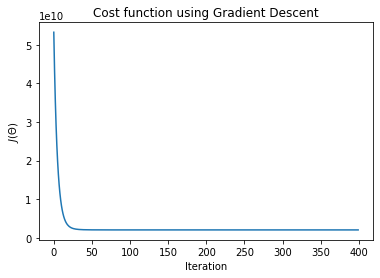

In [21]:
plt.plot(J_old)
plt.xlabel("Iteration")
plt.ylabel("$J(\Theta)$")
plt.title("Cost function using Gradient Descent")

In [22]:
#feature normalisation of x values
x_sample = featureNormalization(np.array([1650,3]))[0]
x_sample=np.append(np.ones(1),x_sample)

In [23]:
def predict(x,theta):
    predictions= np.dot(theta.transpose(),x)
    return predictions[0]

In [24]:
predict1=predict(x_sample,theta)

In [25]:
predict1

456438.8091317578

In [27]:
print("For size of house = 1650, Number of bedroom = 3, we predict a house value of $"+str(round(predict1,0)))

For size of house = 1650, Number of bedroom = 3, we predict a house value of $456439.0
